Project Title:
#  Marketing Campaign for Banking Products

1)Importing the datasets and libraries, check datatype, statistical summary shape, null values etc

In [ ]:
import pandas as pd                
import numpy as np                  
import seaborn as sns               
import matplotlib.pyplot as plt    
%matplotlib inline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
sns.set_style("white")               # The plots color style is set to 'white'
pd.options.mode.chained_assignment = None

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Uploading the local data file**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [ ]:
dc = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df = pd.DataFrame(dc)

**To check the first five elements in the dataset**

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


To know the last 5 elements

In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**DataFrame df's datatypes,columns,Non-Null Count,etc.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
df.shape

(5000, 14)

In [ ]:
print(df.index)
print('')
print(df.columns)

RangeIndex(start=0, stop=5000, step=1)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [ ]:
df[df.isnull()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df[df<0].count()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

**Checking if we need any data cleaning:**

In [ ]:
df[df['Experience'] < 0]['Experience'].count()

52

In [ ]:
lmdvalue = int(df['Experience'].median())
for i in range(len(df)):
    if df['Experience'].iloc[i] < 0:
       df['Experience'].iloc[i] = lmdvalue

In [ ]:
df[df['Experience'] < 0]['Experience'].count()

0

In [ ]:
df.set_index(['ID'], inplace=True)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

**Explanatory Data Analysis(EDA)**

**Finding out the unique data:**

In [ ]:
df.apply(lambda x: len(x.unique()))

age                    45
experience             44
income                162
zip code              467
family                  4
ccavg                 108
education               3
mortgage              347
personal loan           2
securities account      2
cd account              2
online                  2
creditcard              2
dtype: int64

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['age', 'experience', 'income', 'zip code', 'family', 'ccavg',
       'education', 'mortgage', 'personal loan', 'securities account',
       'cd account', 'online', 'creditcard'],
      dtype='object')

**Number of people with zero mortgage?**

In [ ]:
df[df['mortgage'] == 0]['mortgage'].count()

3462

**Number of people with zero credit card spending per month**

In [ ]:
df[df['ccavg'] == 0]['ccavg'].count()

106

**Value counts of all categorical columns.**

In [ ]:
df['education'].value_counts()

1    2096
3    1501
2    1403
Name: education, dtype: int64

In [ ]:
df['personal loan'].value_counts()

0    4520
1     480
Name: personal loan, dtype: int64

In [ ]:
df['securities account'].value_counts()

0    4478
1     522
Name: securities account, dtype: int64

In [ ]:
df['cd account'].value_counts()

0    4698
1     302
Name: cd account, dtype: int64

In [ ]:
df['online'].value_counts()

1    2984
0    2016
Name: online, dtype: int64

In [ ]:
df['creditcard'].value_counts()

0    3530
1    1470
Name: creditcard, dtype: int64

In [ ]:
df_ser = df[['personal loan', 'securities account', 'cd account', 'online', 'creditcard']]
df_serg= df_ser.groupby('personal loan').sum()
df_serg

,securities account,cd account,online,creditcard
personal loan,,,,
0,462,162,2693,1327
1,60,140,291,143


In [ ]:
df_serg.describe().T

,count,mean,std,min,25%,50%,75%,max
securities account,2.0,261.0,284.256926,60.0,160.5,261.0,361.5,462.0
cd account,2.0,151.0,15.556349,140.0,145.5,151.0,156.5,162.0
online,2.0,1492.0,1698.470488,291.0,891.5,1492.0,2092.5,2693.0
creditcard,2.0,735.0,837.214429,143.0,439.0,735.0,1031.0,1327.0


**Univariate Analysis**

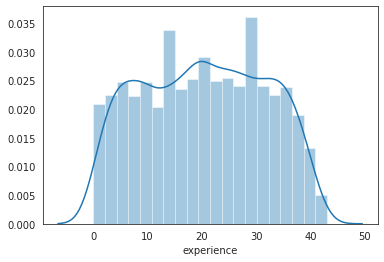

In [ ]:
#experimenting with all types of commands for univariate analysis
sns.distplot(df.experience.dropna(), kde=True);

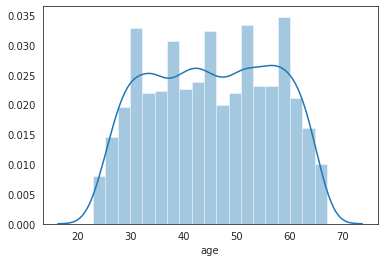

In [ ]:
sns.distplot(df['age'], kde=True);

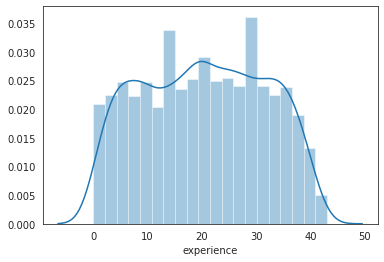

In [ ]:
sns.distplot(df['experience']);

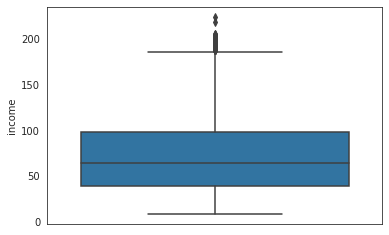

In [ ]:
sns.boxplot(df['income'], orient='vertical');

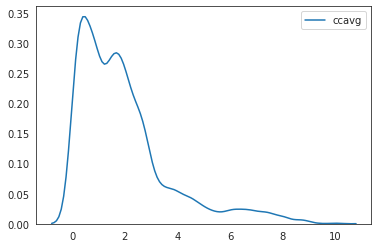

In [ ]:
sns.kdeplot(df['ccavg']);

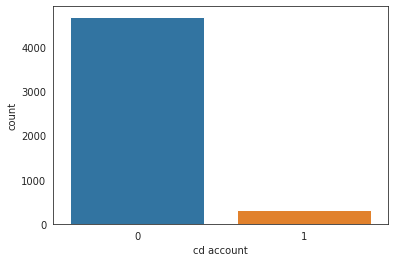

In [ ]:
sns.countplot(df['cd account']);

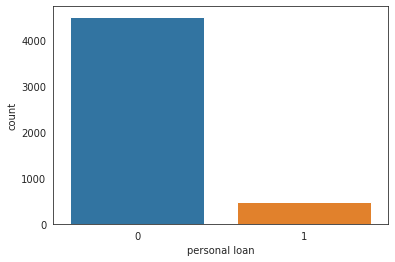

In [ ]:
sns.countplot(df['personal loan']);

**Bivariate Analysis**

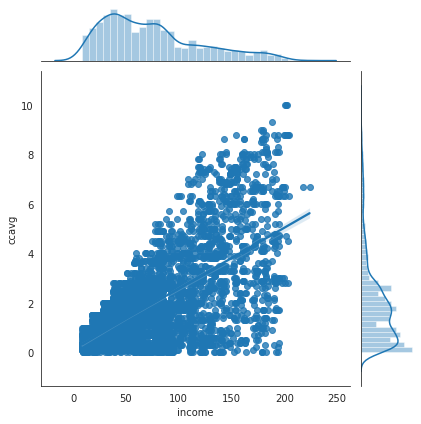

In [ ]:
sns.jointplot(x='income',y='ccavg',data=df,kind='reg');

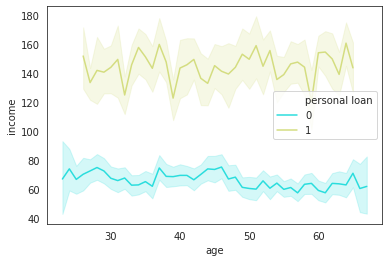

In [ ]:
sns.lineplot(x="age", y="income", hue='personal loan', data=df,palette='rainbow');

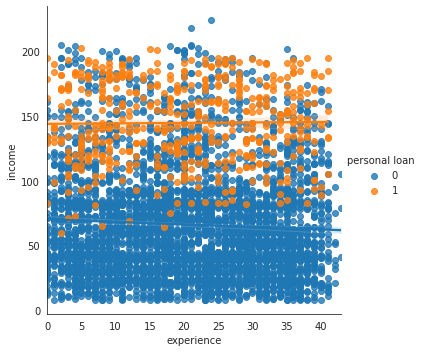

In [ ]:
sns.lmplot(x='experience', y='income', hue='personal loan', data=df);

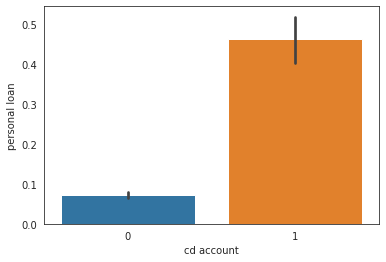

In [ ]:
sns.barplot(x='cd account', y='personal loan', data=df);

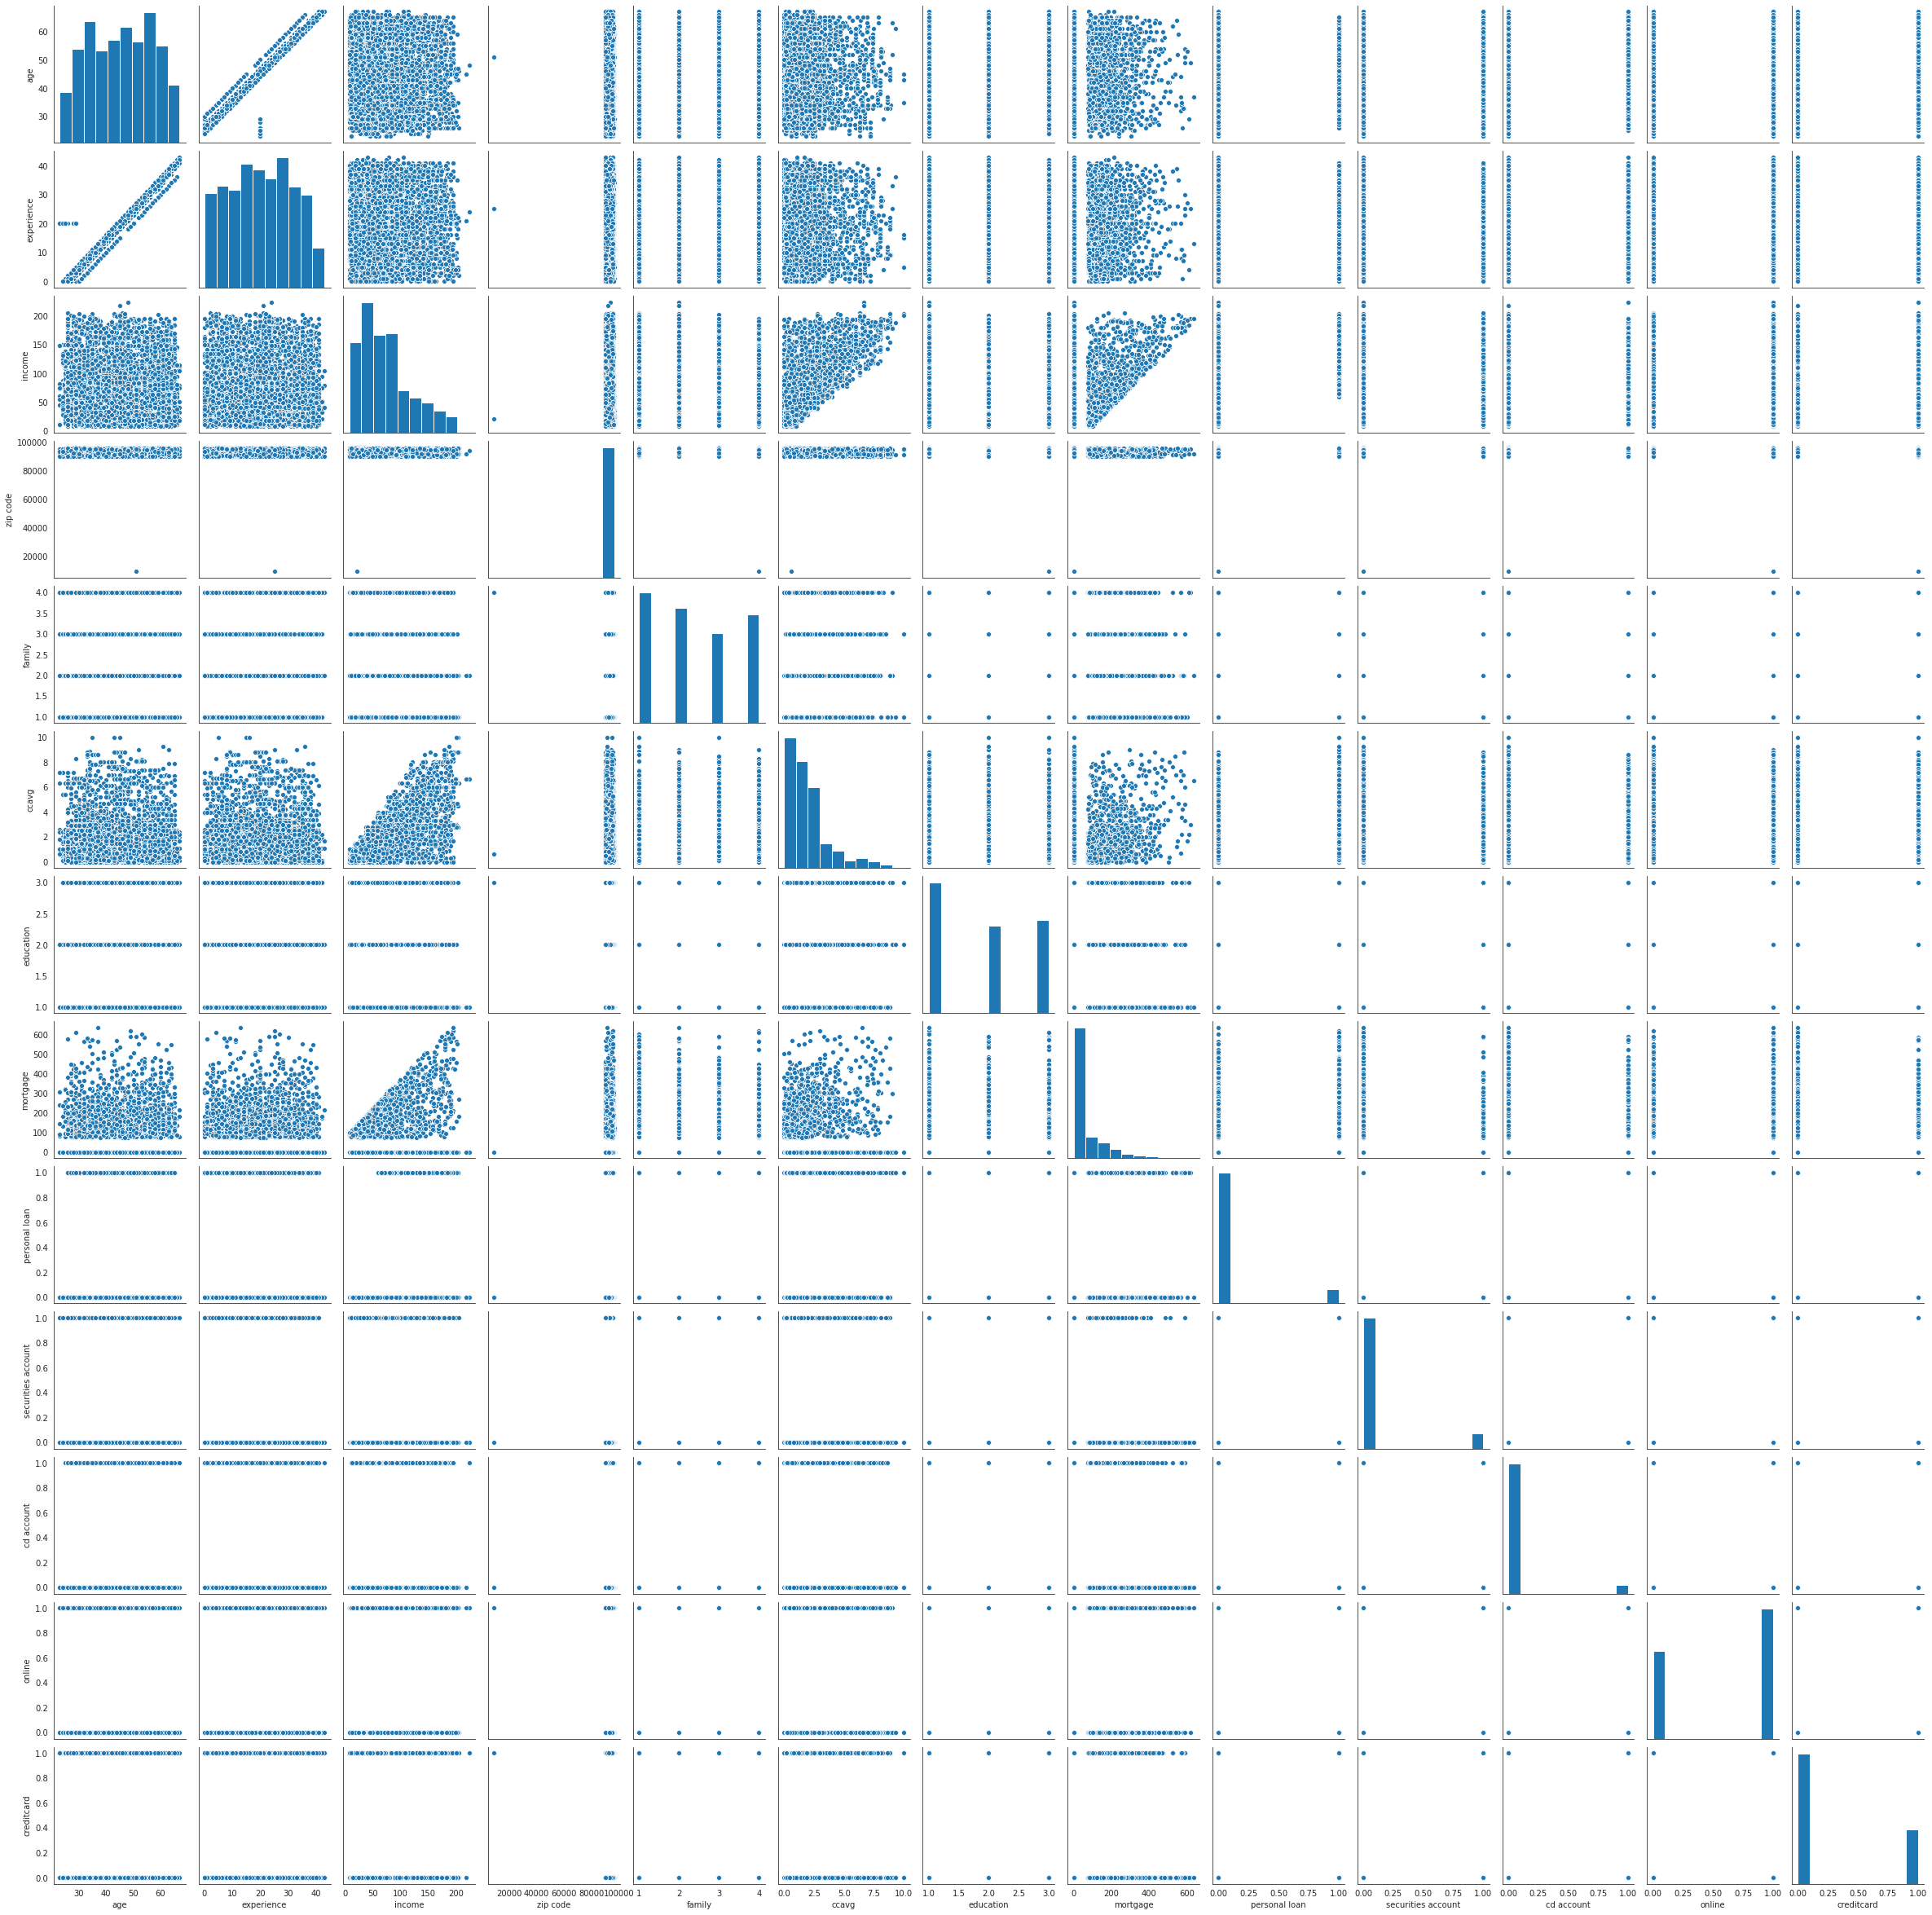

In [ ]:
sns.pairplot(df, palette='coolwarm');

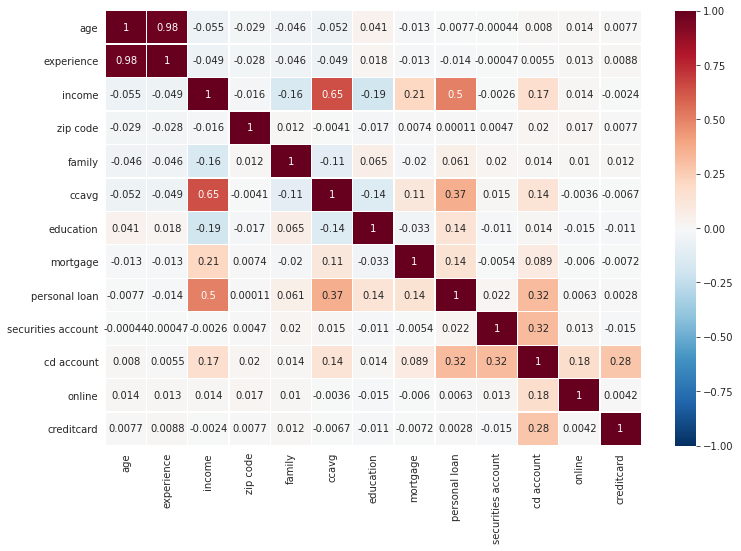

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, vmin=-1,vmax=1,center=0, cmap='RdBu_r',linecolor='white',linewidths=0.25);